In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics as smt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('house_price_prediction.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df.shape

(21613, 21)

In [8]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

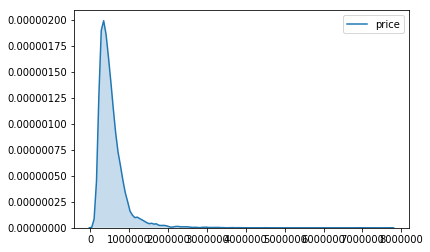

In [10]:
sns.kdeplot(df['price'],shade=True)

In [12]:
new_price = np.log(df['price'])
new_price

0        12.309982
1        13.195614
2        12.100712
3        13.311329
4        13.142166
5        14.018451
6        12.458775
7        12.583995
8        12.343658
9        12.685408
10       13.403776
11       13.056224
12       12.644328
13       12.899220
14       13.180632
15       13.384728
16       12.886641
17       13.091904
18       12.149502
19       12.345835
20       12.860999
21       14.508658
22       12.560244
23       12.439958
24       12.703813
25       12.358794
26       13.750439
27       13.410545
28       12.989974
29       13.485617
           ...    
21583    12.899095
21584    12.847927
21585    12.506177
21586    13.132314
21587    12.860999
21588    12.934828
21589    12.758520
21590    14.016409
21591    13.256894
21592    13.071070
21593    13.899852
21594    12.765688
21595    13.161584
21596    13.429775
21597    14.269766
21598    13.202652
21599    13.604790
21600    14.245343
21601    13.054085
21602    12.319401
21603    13.136759
21604    12.

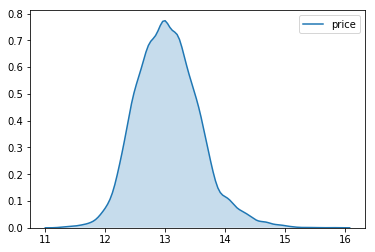

In [13]:
sns.kdeplot(new_price,shade=True)

In [87]:
x = np.array(new_price).reshape(21613,1)
x

array([[12.30998211],
       [13.19561384],
       [12.10071213],
       ...,
       [12.90445858],
       [12.89921983],
       [12.69158046]])

In [88]:
y = np.array(df.sqft_living).reshape(21613,1)
y

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]])

In [89]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=50)

In [90]:
linreg = LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [91]:
linreg.coef_

array([[1217.77811494]])

In [92]:
linreg.intercept_

array([-13807.88774337])

In [93]:
y_pred = linreg.predict(x_test)
y_pred

array([[2243.19779507],
       [1506.78093157],
       [2196.35440011],
       ...,
       [1352.25493319],
       [2709.07506275],
       [1888.26078164]])

In [94]:
df1 = pd.DataFrame.from_dict({'Actual':list(y_test),'Predicted':list(y_pred)})
df1.head()

,Actual,Predicted
0,[1660],[2243.19779506914]
1,[960],[1506.7809315683753]
2,[2730],[2196.3544001137707]
3,[2900],[2135.146637700691]
4,[1590],[1915.627733679532]


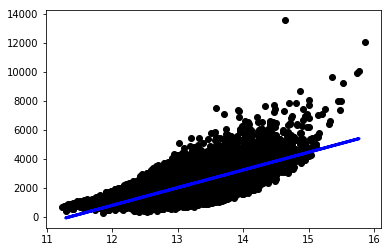

In [95]:
plt.scatter(x,y,color='black')
plt.plot(x_test,y_pred, color='blue', linewidth=3)

plt.show()